**Importing modules**

In [1]:
import pandas as pd,numpy as np,matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,plot_precision_recall_curve,plot_roc_curve

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

**Importing datasets of heart attack rate**

In [3]:
df1=pd.read_csv('heart.csv')

In [4]:
df1.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df1.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [6]:
df1

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [7]:
features=[]
for i in df1.columns:
    features.append(i)
    
features

['age',
 'sex',
 'cp',
 'trtbps',
 'chol',
 'fbs',
 'restecg',
 'thalachh',
 'exng',
 'oldpeak',
 'slp',
 'caa',
 'thall',
 'output']

In [8]:
df1.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

**Dummifying is not done becaue it is already dummied**

In [9]:
x=df1[features[:-1]].values
y=df1[features[-1]].values

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.3)

In [11]:
len(x_train),len(x_test),len(y_train),len(y_test)

(212, 91, 212, 91)

In [12]:
x_test.shape,x_train.shape,y_train.shape,y_test.shape

((91, 13), (212, 13), (212,), (91,))

**Importing modules for observing different types prediction scores**

In [13]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score

**Doing Logistic Regression on the dataset**

In [17]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

c:\users\tuhin\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
y_pred=lr.predict(x_test)

**Accuracy Score of the model**

In [29]:
accuracy=accuracy_score(y_pred,y_test)
print('%0.2f'%accuracy)

0.81


**Precision Score of the model**

In [23]:
precision=precision_score(y_pred,y_test)
precision

0.84

**Recall Score of the model**

In [32]:
recall=recall_score(y_pred,y_test)
print('%0.2f'%recall)

0.82


**This plotting to be done first to see what to include and what to exclude**

<Figure size 720x504 with 0 Axes>

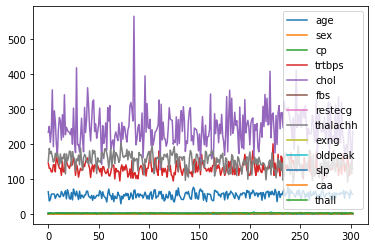

In [42]:
plt.figure(figsize=(10,7))
df1[features[:-1]].plot()
plt.legend()

In [43]:
lr.predict_proba(x_test)

array([[8.54149041e-01, 1.45850959e-01],
       [2.11134894e-01, 7.88865106e-01],
       [1.73103939e-01, 8.26896061e-01],
       [9.85023620e-01, 1.49763803e-02],
       [7.52183991e-02, 9.24781601e-01],
       [5.60485109e-02, 9.43951489e-01],
       [4.60310498e-01, 5.39689502e-01],
       [9.98340357e-01, 1.65964312e-03],
       [9.94579749e-01, 5.42025132e-03],
       [5.59986951e-01, 4.40013049e-01],
       [1.49547683e-01, 8.50452317e-01],
       [8.70429937e-01, 1.29570063e-01],
       [6.88004395e-02, 9.31199560e-01],
       [9.76805267e-01, 2.31947326e-02],
       [2.06945765e-02, 9.79305424e-01],
       [4.56736559e-02, 9.54326344e-01],
       [2.37724243e-02, 9.76227576e-01],
       [9.44964820e-01, 5.50351795e-02],
       [9.94169742e-01, 5.83025771e-03],
       [9.83657635e-01, 1.63423655e-02],
       [2.42219761e-01, 7.57780239e-01],
       [9.88283645e-01, 1.17163549e-02],
       [7.72319443e-01, 2.27680557e-01],
       [2.07125077e-01, 7.92874923e-01],
       [1.039398

In [44]:
lr.coef_

array([[ 9.45041586e-03, -1.00001057e+00,  8.16130582e-01,
        -3.87650810e-03, -1.17795510e-03,  1.50642543e-01,
         6.04946866e-01,  2.03042740e-02, -9.22459752e-01,
        -5.38600852e-01,  7.74391492e-01, -1.00187952e+00,
        -1.19204446e+00]])

In [45]:
lr.intercept_

array([-0.00851767])

**Confusion Matrix**

In [47]:
cm=confusion_matrix(y_pred,y_test)
cm

array([[32,  8],
       [ 9, 42]], dtype=int64)

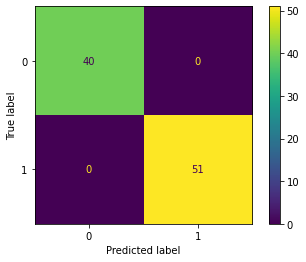

In [69]:
plot_confusion_matrix(lr,x_test,y_pred)#cmap=plt.cm.Blues for blues
plt.show()

In [64]:
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1], dtype=int64)